# Business Understanding

The dataset consists out of data for sold houses.

The following features are available:

## id
Shows the unique id of the sold house.
Should not be relevant for the analysis.

## date 
The date of the sale might be interesting, since it is known, that the prices change by times.
Data type is -object-

## bedrooms
Number of bedrooms within the house.

## bathrooms
Number of bathrooms sold within the house. A bathroom that count's less than one means, that it is not fully equipped. For example only a toilet with no shower, this won't count as a full bathroom.

## sqft_living
Squarefeet of the home.

## sqft_lot
Squarefeet of the lot.

## floors
Levels in the house

## waterfront
View to waterfront available.

## view
Quality of view from house.

## condition
The overall condition of the house

## grade
Grade of the house according to a grading system

## sqft_above
The square footage inside the house above the basement

## yr_built
Built year.

## yr_renovated

## zipcode
Postal code. Might be interesting to use this for clustering.

## lat / long
Geographical postition of the house

## sqft_living_15
The square footage of linving space inside the house of the nearest 15 neighbours.

## sqft_lot_15
The square footage of the lot space of the nearest 15 neighbours.




In [246]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
from pandas.plotting import scatter_matrix

In [125]:
data = pd.read_csv('King_County_House_prices_dataset.csv')

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# Data Mining

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [14]:
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [12]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


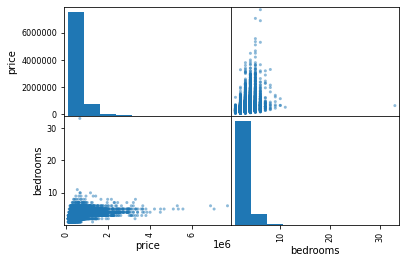

In [9]:
scatter_matrix(data[['price', 'bedrooms']],diagonal='hist');


In [19]:
data.sort_values('price', ascending=False).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0.0,3.0,...,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1.0,2.0,...,11,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,...,13,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0.0,0.0,...,13,6200,3000.0,2001,NaN,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0.0,4.0,...,12,6720,1280.0,2009,0.0,98004,47.6232,-122.220,4600,21750


In [24]:
data.sort_values('price', ascending=False).tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0.0,0.0,...,5,520,0.0,1951,0.0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0.0,0.0,...,6,860,0.0,1954,0.0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,NaN,0.0,...,5,730,0.0,1943,0.0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,NaN,0.0,...,4,430,0.0,1912,0.0,98014,47.6499,-121.909,1200,7500
15279,40000362,5/6/2014,78000.0,2,1.00,780,16344,1.0,0.0,0.0,...,5,780,0.0,1942,NaN,98168,47.4739,-122.280,1700,10387


# Data Cleaning

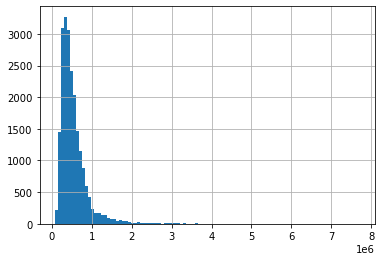

In [34]:
data.price.hist(bins = 100)

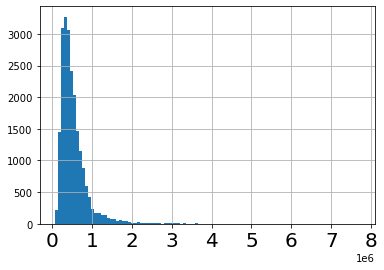

In [37]:
data.price.hist(bins = 100, xlabelsize = 20)

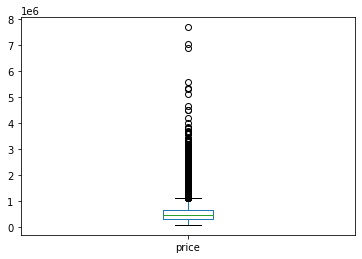

In [32]:
data.price.plot(kind = 'box')

According to the price, the data can be clustered into four groups. For clustering we use the slope in the histogramm.

- Houses from 0 to 1 million dollars. 
- Houses from 1 to 2 million dollars.
- Houses from 2 to 4 million dollars.
- Houses that cost more than 4 million dollars.

# Data Cleaning

# price

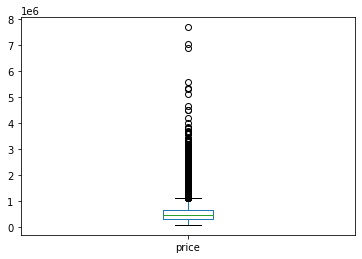

In [240]:
data.price.plot(kind='box');

To be more accurate, everything above the 90th percentile is going to be removed. As the high values are not a good comparison values for the other house sales.

In [242]:
data = data.drop(data[data.price > 900000].index)

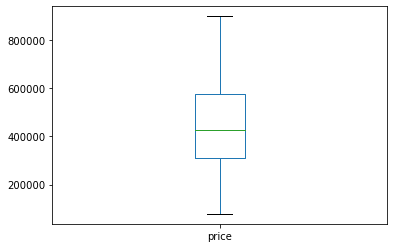

In [243]:
data.price.plot(kind='box');



# Date
The date consinst of a string. But to work with it, it needs to be an integer, and the year must be leading.


In [126]:
data['date'] = pd.to_datetime(data['date']).dt.strftime('%Y-%m-%d')

In [127]:
data['date'].replace('-','',regex=True,inplace=True)

In [128]:
data.date = data.date.astype(int)

In [120]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,20140521,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,20150223,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,20140623,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,20150116,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


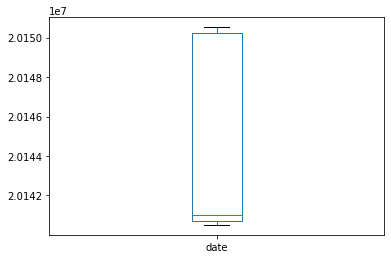

In [107]:
data.date.plot(kind ='box')

In [108]:
data.sort_values('date', ascending=True).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7316,2202500290,20140502,435000.0,4,1.0,1450,8800,1.0,0.0,0.0,...,7,1450,0.0,1954,0.0,98006,47.5746,-122.135,1260,8942
20586,7853361370,20140502,555000.0,4,2.5,3310,6500,2.0,0.0,0.0,...,8,3310,0.0,2012,0.0,98065,47.5150,-121.870,2380,5000
1040,7197300105,20140502,550000.0,4,2.5,1940,10500,1.0,NaN,0.0,...,7,1140,800.0,1976,0.0,98052,47.6830,-122.114,2200,10500
20543,3438501320,20140502,295000.0,2,2.5,1630,1368,2.0,0.0,0.0,...,7,1280,350.0,2009,0.0,98106,47.5489,-122.363,1590,2306
9587,472000620,20140502,790000.0,3,2.5,2600,4750,1.0,0.0,0.0,...,9,1700,900.0,1951,0.0,98117,47.6833,-122.400,2380,4750


In [109]:
data.sort_values('date', ascending=True).tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19381,8149600265,20150514,725000.0,4,1.75,1980,5850,1.0,NaN,1.0,...,8,1380,600.0,1960,0.0,98116,47.5607,-122.391,1810,5850
12623,4166600610,20150514,335000.0,3,2.00,1410,44866,1.0,0.0,0.0,...,7,1410,0.0,1985,0.0,98023,47.3273,-122.370,2950,29152
5632,7923600250,20150515,450000.0,5,2.00,1870,7344,1.5,0.0,0.0,...,7,1870,0.0,1960,0.0,98007,47.5951,-122.144,1870,7650
13040,5101400871,20150524,445500.0,2,1.75,1390,6670,1.0,0.0,0.0,...,6,720,670.0,1941,0.0,98115,47.6914,-122.308,920,6380
16580,9106000005,20150527,1310000.0,4,2.25,3750,5000,2.0,0.0,0.0,...,8,2440,1310.0,1924,0.0,98115,47.6747,-122.303,2170,4590


# Bedrooms

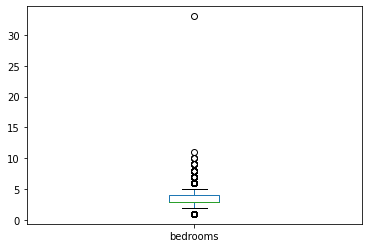

In [110]:
data.bedrooms.plot(kind ='box')

In [131]:
bed5 = data.loc[data['bedrooms'] >= 8]

In [132]:
bed5

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1658,9126101740,20141204,490000.0,8,5.00,2800,2580,2.0,0.0,0.0,...,8,1880,920.0,1997,0.0,98122,47.6086,-122.303,1800,2580
4031,685000115,20141007,2150000.0,8,6.00,4340,9415,2.0,0.0,0.0,...,8,4340,0.0,1967,0.0,98004,47.6316,-122.202,2050,9100
4063,7226500100,20150219,373000.0,8,3.00,2850,12714,1.0,NaN,0.0,...,7,2850,0.0,1959,0.0,98055,47.4859,-122.205,1480,4942
4092,1997200215,20140507,599999.0,9,4.50,3830,6988,2.5,0.0,0.0,...,7,2450,1380.0,1938,0.0,98103,47.6927,-122.338,1460,6291
4231,2902200015,20150106,700000.0,9,3.00,3680,4400,2.0,0.0,0.0,...,7,2830,850.0,1908,0.0,98102,47.6374,-122.324,1960,2450
6073,9822700190,20140808,1280000.0,9,4.50,3650,5000,2.0,0.0,0.0,...,8,2530,1120.0,1915,2010.0,98105,47.6604,-122.289,2510,5000
6168,1873400020,20140703,340000.0,8,2.75,2790,6695,1.0,NaN,0.0,...,7,1470,1320.0,1977,NaN,98133,47.7565,-122.331,1760,7624
8537,424049043,20140811,450000.0,9,7.50,4050,6504,2.0,0.0,0.0,...,7,4050,0.0,1996,0.0,98144,47.5923,-122.301,1448,3866
8748,1773100755,20140821,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,...,7,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960
9068,6746700615,20150318,700000.0,8,2.50,2280,3000,1.5,0.0,0.0,...,7,1210,1070.0,1911,0.0,98105,47.6675,-122.316,1610,3000


There are houses with a lot bedrooms. Most of them seem to be reasonable, even they are a lot. But the one with 33 bedrooms doesn't make sense at all. There is only 1620sqft for the 33 bedrooms in one floor. This entry will be removed from the data completly.

In [129]:
indexNames = data[ (data['bedrooms'] == 33) ].index

In [130]:
data.drop(indexNames , inplace = True)

# id
Are there any duplicate id? They are going to be identified, as entries with the same id and the same gps position.

In [139]:
duplicateRowsDF = data[data.duplicated(['id', 'lat', 'long'])]
print("Duplicate Rows based on a single column are:", duplicateRowsDF, sep='\n')

Duplicate Rows based on a single column are:
Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]


There are 177 ids, with several entries, they are going to be removed.

In [138]:
data.drop_duplicates(subset = 'id', keep = 'first', inplace = True)


In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21419 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21419 non-null  int64  
 1   date           21419 non-null  int64  
 2   price          21419 non-null  float64
 3   bedrooms       21419 non-null  int64  
 4   bathrooms      21419 non-null  float64
 5   sqft_living    21419 non-null  int64  
 6   sqft_lot       21419 non-null  int64  
 7   floors         21419 non-null  float64
 8   waterfront     19066 non-null  float64
 9   view           21356 non-null  float64
 10  condition      21419 non-null  int64  
 11  grade          21419 non-null  int64  
 12  sqft_above     21419 non-null  int64  
 13  sqft_basement  21419 non-null  object 
 14  yr_built       21419 non-null  int64  
 15  yr_renovated   17615 non-null  float64
 16  zipcode        21419 non-null  int64  
 17  lat            21419 non-null  float64
 18  long  

# bathrooms


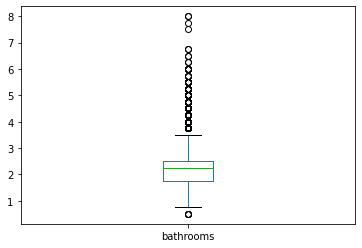

In [143]:
data.bathrooms.plot(kind ='box');

In [151]:
data.sort_values('bathrooms', ascending=False).tail(n=10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8206,2144800615,20140625,190000.0,1,0.75,930,29258,1.0,0.0,0.0,...,6,930,0.0,1941,0.0,98178,47.4837,-122.236,2000,18321
465,8658300340,20140523,80000.0,1,0.75,430,5050,1.0,NaN,0.0,...,4,430,0.0,1912,0.0,98014,47.6499,-121.909,1200,7500
12856,9358000650,20150423,399950.0,2,0.75,1330,2856,1.0,0.0,0.0,...,7,930,400.0,1916,0.0,98126,47.5671,-122.370,1330,2856
3686,6303401050,20150220,132500.0,3,0.75,850,8573,1.0,0.0,0.0,...,6,600,250.0,1945,0.0,98146,47.5030,-122.356,850,8382
15367,2856101479,20140701,276000.0,1,0.75,370,1801,1.0,0.0,0.0,...,5,370,0.0,1923,0.0,98117,47.6778,-122.389,1340,5000
6096,222029026,20140917,340000.0,2,0.75,1060,48292,1.0,1.0,2.0,...,6,560,500.0,1947,0.0,98070,47.4285,-122.511,750,80201
12029,2991000160,20141212,312500.0,4,0.50,2300,5570,2.0,0.0,0.0,...,8,2300,?,1996,NaN,98092,47.3285,-122.168,1820,6371
10413,7129800036,20150114,109000.0,2,0.50,580,6900,1.0,0.0,0.0,...,5,580,0.0,1941,0.0,98118,47.5135,-122.262,1570,5040
2259,3971701455,20141003,273000.0,2,0.50,1180,7750,1.0,0.0,0.0,...,6,590,590.0,1945,0.0,98155,47.7690,-122.316,1380,8976
11662,7987400316,20140814,255000.0,1,0.50,880,1642,1.0,0.0,0.0,...,6,500,380.0,1910,0.0,98126,47.5732,-122.372,1410,2992


In [145]:
bath8 = data.loc[data['bathrooms'] >= 8]
bath8

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,20141013,7700000.0,6,8.0,12050,27600,2.5,0.0,3.0,...,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
12764,1225069038,20140505,2280000.0,7,8.0,13540,307752,3.0,0.0,4.0,...,12,9410,4130.0,1999,0.0,98053,47.6675,-121.986,4850,217800


Even there are some houses with a large amount of bathrooms, they seem to be reasonable.

## sqft_living

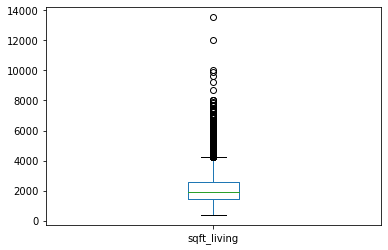

In [147]:
data.sqft_living.plot(kind='box');

The biggest available house in Hamburg has around 7500 sqft living area. In this dataset the biggest house has less than 1400 sqft. This is plausible, as houses in Hamburg are not the biggest, and the biggest house in the dataset is not even twice big.

## sqft_lot

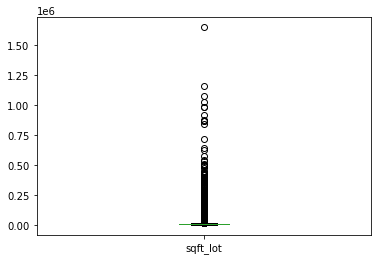

In [149]:
data.sqft_lot.plot(kind = 'box');

The biggest lot is twice big as the lot of Buckingham Palace, that's very big, but still plausible.

## floors

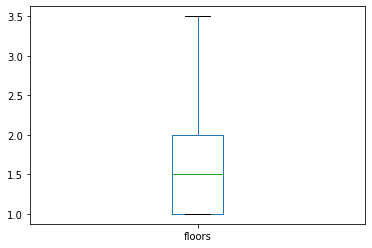

In [152]:
data.floors.plot(kind = 'box');

Everything is reasonable.

## waterfront
There are to less entries in waterfront.

In [155]:
data.waterfront.unique()

array([nan,  0.,  1.])

'nan' will be considered as 0.

In [156]:
data.waterfront.fillna(0, inplace = True)

In [157]:
data.waterfront.unique()

array([0., 1.])

## view
There are about 100 entries with a missing entry.

In [158]:
data.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

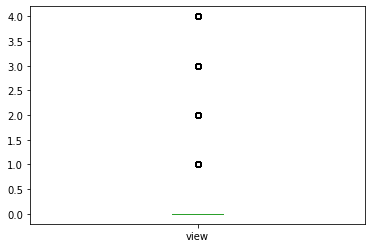

In [161]:
data.view.plot(kind ='box');

Most houses have the value zero (median). The missing fields will be replaced with 0.

In [162]:
data.view.fillna(0, inplace = True)

## condition

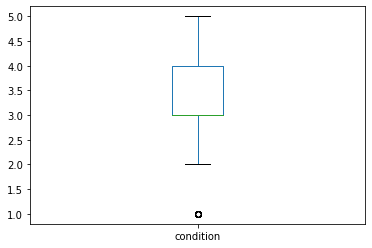

In [165]:
data.condition.plot(kind ='box');

The values are reasonable. No values are missing.

## grade

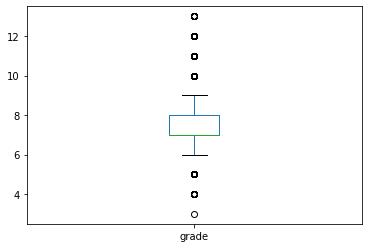

In [172]:
data.grade.plot(kind = 'box');

The values are reasonable. No values are missing.

## sqft above

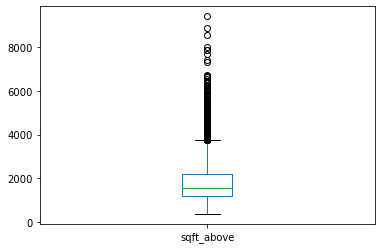

In [175]:
data.sqft_above.plot(kind = 'box');

The values are reasonable. No values are missing.

## sqft basement

In [178]:
data.sqft_basement.value_counts()

0.0       12717
?           452
600.0       216
500.0       206
700.0       205
          ...  
4820.0        1
1920.0        1
2400.0        1
2050.0        1
1481.0        1
Name: sqft_basement, Length: 304, dtype: int64

The '?' entries will be considered as 0 sqft basement.

In [181]:
data.sqft_basement.replace('?', 0, inplace = True)

In [182]:
data.sqft_basement.value_counts()

0.0       12717
0           452
600.0       216
500.0       206
700.0       205
          ...  
176.0         1
508.0         1
248.0         1
417.0         1
2400.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [189]:
data.sqft_basement = data.sqft_basement.astype(float)

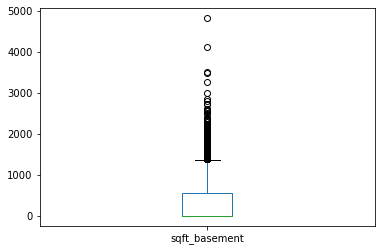

In [192]:
data.sqft_basement.plot(kind = 'box');

Around 5000sqft is a very large basement, but still possible. So the data is plausible.

## yr_built

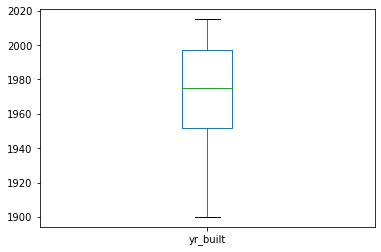

In [194]:
data.yr_built.plot(kind='box');

The data is reasonable.

## yr_renovated

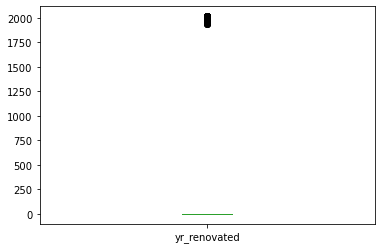

In [199]:
data.yr_renovated.plot(kind='box');

In [203]:
data.yr_renovated.value_counts()

0.0       16875
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1934.0        1
1971.0        1
1954.0        1
1950.0        1
1944.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [208]:
data.yr_renovated.replace('',0,regex=True,inplace=True)

In [210]:
renovated_nonzero = data[data.yr_renovated != 0]

In [211]:
renovated_nonzero.yr_renovated.median()

2000.0

The meaning of the 0 entries will be interpreted as not renovated. This means the renovation year will be set to year builded.

In [231]:
data.yr_renovated.fillna(0, inplace = True)

In [234]:
data.yr_renovated.replace(0, data.yr_built, regex=True, inplace=True)

In [235]:
data.yr_renovated.value_counts()

2014.0    632
2005.0    479
2006.0    473
2004.0    451
2003.0    450
         ... 
1901.0     28
1902.0     26
1933.0     23
1935.0     20
1934.0     15
Name: yr_renovated, Length: 116, dtype: int64

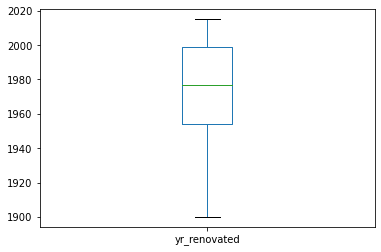

In [236]:
data.yr_renovated.plot(kind='box');

In [237]:
data.sort_values('yr_renovated', ascending=False).tail(n=10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5231,844000425,20141223,199999.0,3,1.00,960,10815,1.0,0.0,0.0,...,5,960,0.0,1900,1900.0,98010,47.3091,-122.006,1330,10815
14973,9187200095,20141202,432500.0,6,2.00,3080,5500,2.0,0.0,0.0,...,7,3080,0.0,1900,1900.0,98122,47.6031,-122.296,1830,5000
11522,3365900520,20140618,192500.0,3,1.00,1080,8580,1.5,0.0,0.0,...,6,1080,0.0,1900,1900.0,98168,47.4716,-122.262,1800,12672
2005,2207500695,20150304,1020000.0,4,2.50,2960,4760,2.0,0.0,0.0,...,8,2160,800.0,1900,1900.0,98102,47.6367,-122.318,1600,4760
9469,1931300665,20141009,850000.0,3,3.00,1910,4800,1.5,0.0,0.0,...,9,1910,0.0,1900,1900.0,98103,47.6572,-122.346,1280,1310
12122,2767604170,20150406,975000.0,3,3.00,1850,5000,1.5,0.0,0.0,...,6,1850,0.0,1900,1900.0,98107,47.6711,-122.386,1360,2500
8996,5160700035,20150422,431000.0,2,1.50,1300,4000,1.5,0.0,0.0,...,6,1300,0.0,1900,1900.0,98144,47.5937,-122.301,1480,4000
6132,7883605915,20150508,337500.0,3,1.00,1020,6000,1.5,0.0,0.0,...,7,1020,0.0,1900,1900.0,98108,47.5254,-122.318,1240,6000
18061,5457800930,20140613,1700000.0,2,2.25,3170,3000,2.0,0.0,2.0,...,10,1990,1180.0,1900,1900.0,98109,47.6291,-122.351,2980,5061
3915,7883604065,20150501,210000.0,2,1.00,1100,6000,1.5,0.0,0.0,...,6,1100,0.0,1900,1900.0,98108,47.5275,-122.323,1280,6000


## zipcode

In [215]:
data.zipcode.unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

The values are reasonable. No values are missing.

## lat/long

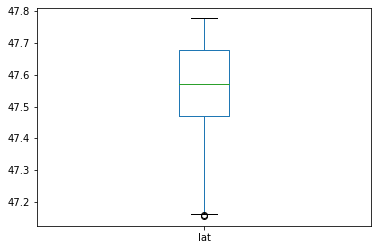

In [217]:
data.lat.plot(kind ='box');

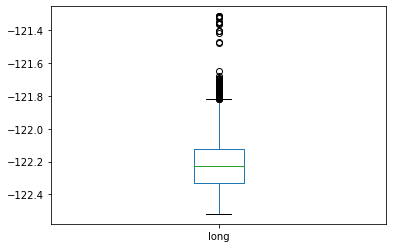

In [219]:
data.long.plot(kind='box');

The data is reasonable.

## sqft_living15

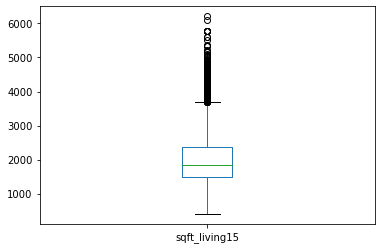

In [221]:
data.sqft_living15.plot(kind='box');

The data is reasonable.

## sqft_lot15

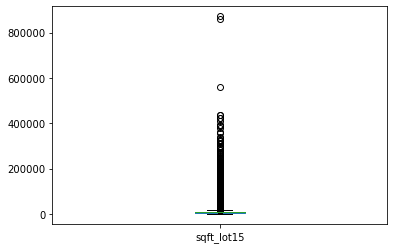

In [223]:
data.sqft_lot15.plot(kind='box');

The data is reasonable.

In [244]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19396 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19396 non-null  int64  
 1   date           19396 non-null  int64  
 2   price          19396 non-null  float64
 3   bedrooms       19396 non-null  int64  
 4   bathrooms      19396 non-null  float64
 5   sqft_living    19396 non-null  int64  
 6   sqft_lot       19396 non-null  int64  
 7   floors         19396 non-null  float64
 8   waterfront     19396 non-null  float64
 9   view           19396 non-null  float64
 10  condition      19396 non-null  int64  
 11  grade          19396 non-null  int64  
 12  sqft_above     19396 non-null  int64  
 13  sqft_basement  19396 non-null  float64
 14  yr_built       19396 non-null  int64  
 15  yr_renovated   19396 non-null  float64
 16  zipcode        19396 non-null  int64  
 17  lat            19396 non-null  float64
 18  long  

# Correlation analysis

In [245]:
continuous_var = list(data.select_dtypes(['int64','float64']).columns.values)
continuous_var.remove('id')
categorical_var=['zipcode']

(19396, 21)

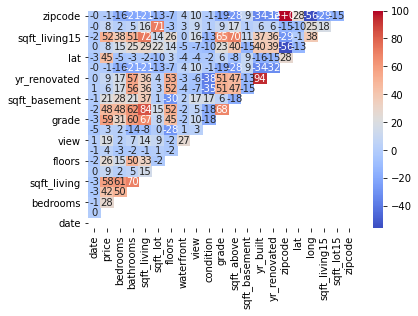

In [248]:
data_dum=pd.get_dummies(data[continuous_var+categorical_var].copy())
mask = np.triu(data_dum.corr())
ax = sns.heatmap(round(data_dum.corr()*100,0),annot=True,mask=mask,cmap='coolwarm')
ax.set_ylim((0,21))
data_dum.shape

In [ ]:
sns.pairplot(data_dum)

ValueError: could not broadcast input array from shape (19396) into shape (2)